## this is a draft to follow the performance of several mice across sessions for a set of behavioral parameters saved in pickled files 

In [2]:
import os
import pickle
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt #Creation de graphiques et de visualisations comme matlab
from matplotlib.patches import Polygon #Creation de graphiques et de visualisations comme matlab
from matplotlib import cm
import matplotlib.patches as mpatches
import gc
import glob
import time
from behavior_analysis_functions import list_sessions_analyzed, \
                                    process_session, html_mouse, load_data, MOUSE_STRING


In [32]:
# the path_to_data_folder is the path of the folder where you store your different mice.

# Windows:
# path_to_data_folder='C:'+os.sep+'Users'+os.sep+'MORVAN'+os.sep+'Documents'+os.sep+'patchouris'+os.sep+'Sample_Data'+os.sep
# Linux:
# path_to_data_folder '/home/david/Documents/Code/ForagingProject/Patchouris/patchouris/Sample_Data/'
# MacOs
# path_to_data_folder = '/Users/davidrobbe/Documents/Science/Data/ForagingMice/'

path_to_data_folder='/home/david/Documents/David/Data/'

#path_to_data_folder = '/Users/davidrobbe/Documents/Science/Data/ForagingMice/'

# List all mice in the data folder (If you want to process all the mice in your data folder),
mice_list = [os.path.basename(path) for path in glob.glob(path_to_data_folder + "/MOU*")]
mice_list=sorted(mice_list)
print(f'Found {len(mice_list)} {"mice" if len(mice_list) > 1 else "mouse"} in the data folder:')


#If you want to process a subset of mice uncomment the line below and comment the 2 lines above

#mice_list: list[str] = ["MOU2334"]  # For processing  a single mice. Equivalent to mice_list = ["MOU2334"] but more correct as it forces to create a list of string
#print(f'Found {len(mice_list)} {"mice" if len(mice_list) > 1 else "mouse"} in the data folder:')

session_list = {}
for mouse in mice_list:
    mouse_folder = path_to_data_folder + mouse
    session_list[mouse] = [name for name in os.listdir(mouse_folder)
                           if os.path.isdir(os.path.join(mouse_folder, name))
                           and name.startswith('MOU')]
    nb_sessions = len(session_list[mouse])
    print(f'Hello, I\'m {mouse}! I have foraged for {nb_sessions} sessions:')
    print(session_list[mouse], '\n')






Found 6 mice in the data folder:
Hello, I'm MOU2329! I have foraged for 22 sessions.
['MOU2329_20240613-0914', 'MOU2329_20240610-1336', 'MOU2329_20240613-1405', 'MOU2329_20240617-0829', 'MOU2329_20240619-0828', 'MOU2329_20240612-0918', 'MOU2329_20240618-1451', 'MOU2329_20240618-0829', 'MOU2329_20240621-0829', 'MOU2329_20240614-0820', 'MOU2329_20240620-1339', 'MOU2329_20240617-1420', 'MOU2329_20240620-0821', 'MOU2329_20240611-0915', 'MOU2329_20240610-0936', 'MOU2329_20240607-1315', 'MOU2329_20240607-1714', 'MOU2329_20240619-1406', 'MOU2329_20240611-1324', 'MOU2329_20240614-1331', 'MOU2329_20240621-1425', 'MOU2329_20240612-1341'] 

Hello, I'm MOU2330! I have foraged for 22 sessions.
['MOU2330_20240617-0848', 'MOU2330_20240613-0933', 'MOU2330_20240617-1438', 'MOU2330_20240620-1357', 'MOU2330_20240619-0846', 'MOU2330_20240621-0848', 'MOU2330_20240619-1424', 'MOU2330_20240620-0838', 'MOU2330_20240607-1733', 'MOU2330_20240614-0840', 'MOU2330_20240611-0936', 'MOU2330_20240612-1400', 'MOU2330_

"""
### Description of `load_pickle_data` Function

The `load_pickle_data` function is designed to recursively traverse a directory structure containing data organized by mice and sessions. It loads variables stored in pickle files across all sessions for a given list of mice.

#### Function Flow:

1. **Initialization**:
   - Initialize an empty dictionary `data` to store loaded data.

2. **Loop Over Mice**:
   - For each mouse specified in `mice_list`, construct the path to the mouse's data folder (`mouse_folder`).
   - Check if `mouse_folder` exists; if not, print a message and skip to the next mouse.

3. **List Session Folders**:
   - Retrieve a list of session folders (`session_folders`) within `mouse_folder`.
   - Filter `session_folders` to include only folders starting with "MOU" using a list comprehension.

4. **Iterate Over Session Folders**:
   - For each session folder (`session_folder`) in `session_folders`, construct the path to `session_folder`.
   - Check if a `Pickle_data` folder exists within `session_folder`.
   - If `Pickle_data` folder is found, initialize an empty dictionary under `data[mouse][session_folder]` to store loaded variables.

5. **Load Pickle Files**:
   - Iterate over `pickle_files` list to specify which pickle files to load.
   - Construct the path to each pickle file (`pickle_file_path`) within `Pickle_data` folder.
   - Check if `pickle_file_path` exists as a file; if not, print a message and skip to the next file.
   - Open and load the pickle file (`pickle.load(pf)`) into `loaded_data`.
   - Use the base name of the pickle file (without extension) as the key in `data[mouse][session_folder]` to store `loaded_data`.

6. **Error Handling**:
   - Catch any exceptions that occur during the loading of pickle files and print an error message.

7. **Return Data**:
   - Return the populated `data` dictionary containing loaded variables from pickle files across all specified mice and sessions.



In [38]:
import os
import pickle
import numpy as np

def load_pickle_data(path_to_data_folder, mice_list, pickle_files):
    data = {}

    for mouse in mice_list:
        mouse_folder = os.path.join(path_to_data_folder, mouse)
        if not os.path.isdir(mouse_folder):
            print(f"Mouse folder not found: {mouse_folder}")
            continue
        
        data[mouse] = {}

        # List session folders starting with 'MOU' within the mouse folder
        session_folders = [folder for folder in os.listdir(mouse_folder) 
                           if folder.startswith('MOU') and os.path.isdir(os.path.join(mouse_folder, folder))]

        for session_folder in session_folders:
            session_folder_path = os.path.join(mouse_folder, session_folder)
            pickle_data_folder = os.path.join(session_folder_path, 'Pickle_data')

            if not os.path.isdir(pickle_data_folder):
                print(f"Pickle_data folder not found in {session_folder_path}")
                continue
            
            data[mouse][session_folder] = {}

            # Load data from pickle files within Pickle_data folder
            for pickle_file in pickle_files:
                pickle_file_path = os.path.join(pickle_data_folder, pickle_file)
                
                if not os.path.isfile(pickle_file_path):
                    print(f"Pickle file not found: {pickle_file_path}")
                    continue
                
                try:
                    with open(pickle_file_path, 'rb') as pf:
                        loaded_data = pickle.load(pf)
                        # Use the pickle file name as key instead of session folder name
                        pickle_file_name = os.path.splitext(pickle_file)[0]  # Extract file name without extension
                        data[mouse][session_folder][pickle_file_name] = loaded_data
                except Exception as e:
                    print(f"Error loading pickle file {pickle_file_path}: {e}")

    return data

# # Example usage
# path_to_data_folder = '/home/david/Documents/David/Data/'
# mice_list = ['MOU2334']  # List of mice names
# pickle_files = ['distance_traveled.pkl']  # List of pickle files to load
# data = load_pickle_data(path_to_data_folder, mice_list, pickle_files)

# # Accessing the loaded data
# print(data['MOU2334']['MOU2334_20240607-1213'])  # Replace with actual session folder name


In [34]:
pickle_files = ['distance_traveled.pkl']  # List of pickle files to load
data = load_pickle_data(path_to_data_folder, mice_list, pickle_files)

### Description of `load_pickle_data` Function

The `load_pickle_data` function recursively traverses a directory structure containing data organized by mice and sessions. It loads variables stored in specified pickle files across all sessions for a given list of mice, calculates additional metrics related to tower visits and quarter turns, and returns the loaded data in a structured dictionary format.

#### Function Flow:

1. **Initialization**:
   - Initializes an empty dictionary `data` to store loaded data.

2. **Loop Over Mice**:
   - Iterates through each mouse specified in `mice_list`.
   - Constructs the path to the mouse's data folder (`mouse_folder`).
   - Checks if `mouse_folder` exists; if not, prints a message and skips to the next mouse.

3. **List Session Folders**:
   - Retrieves a list of session folders (`session_folders`) within `mouse_folder`.
   - Filters `session_folders` to include only folders starting with "MOU" using a list comprehension.

4. **Iterate Over Session Folders**:
   - For each session folder (`session_folder`) in `session_folders`, constructs the path to `session_folder`.
   - Checks if a `Pickle_data` folder exists within `session_folder`.
   - If `Pickle_data` folder is found, initializes an empty dictionary under `data[mouse][session_folder]` to store loaded variables.

5. **Load Pickle Files**:
   - Iterates over `pickle_files` list to specify which pickle files to load.
   - Constructs the path to each pickle file (`pickle_file_path`) within `Pickle_data` folder.
   - Checks if `pickle_file_path` exists as a file; if not, prints a message and skips to the next file.
   - Opens and loads the pickle file (`pickle.load(pf)`) into `loaded_data`.
   - Uses the base name of the pickle file (without extension) as the key in `data[mouse][session_folder]` to store `loaded_data`.

6. **Calculate Metrics**:
   - Specifically for `consecutive_quarter_turns.pkl` file:
     - Computes the number of tower visits (`nber_of_tower_visits`) as the length of `tower_visits`.
     - Calculates the mean number of quarter turns per visit (`mean_nber_of_QT_per_visit`) from the fourth element of each sublist in `tower_visits`.
     - Stores these metrics under `data[mouse][session_folder]` for further analysis.

7. **Error Handling**:
   - Catches any exceptions that occur during the loading of pickle files and prints an error message.

8. **Return Data**:
   - Returns the populated `data` dictionary containing loaded variables and calculated metrics from pickle files across all specified mice and sessions.

#### Example Usage:

```python
path_to_data_folder = '/home/david/Documents/David/Data/'
mice_list = ['MOU2334']  # List of mice names
pickle_files = ['distance_traveled.pkl', 'consecutive_quarter_turns.pkl']  # List of pickle files to load
data = load_pickle_data(path_to_data_folder, mice_list, pickle_files)


In [55]:
import os
import pickle
import numpy as np

def load_pickle_data(path_to_data_folder, mice_list, pickle_files):
    data = {}

    for mouse in mice_list:
        mouse_folder = os.path.join(path_to_data_folder, mouse)
        if not os.path.isdir(mouse_folder):
            print(f"Mouse folder not found: {mouse_folder}")
            continue
        
        data[mouse] = {}

        session_folders = [folder for folder in os.listdir(mouse_folder) 
                           if folder.startswith('MOU') and os.path.isdir(os.path.join(mouse_folder, folder))]
        session_folders=sorted(session_folders)

        for session_folder in session_folders:
            session_folder_path = os.path.join(mouse_folder, session_folder)
            pickle_data_folder = os.path.join(session_folder_path, 'Pickle_data')

            if not os.path.isdir(pickle_data_folder):
                print(f"Pickle_data folder not found in {session_folder_path}")
                continue
            
            data[mouse][session_folder] = {}

            for pickle_file in pickle_files:
                pickle_file_path = os.path.join(pickle_data_folder, pickle_file)
                
                if not os.path.isfile(pickle_file_path):
                    print(f"Pickle file not found: {pickle_file_path}")
                    continue
                
                try:
                    with open(pickle_file_path, 'rb') as pf:
                        loaded_data = pickle.load(pf)
                        pickle_file_name = os.path.splitext(pickle_file)[0]

                        # Store loaded data in data dictionary
                        if pickle_file_name not in data[mouse][session_folder]:
                            data[mouse][session_folder][pickle_file_name] = loaded_data
                        else:
                            print(f"Warning: {pickle_file_name} already exists in {session_folder}")

                        # Calculate tower visits and mean QT per visit
                        if pickle_file_name == 'consecutive_quarter_turns':
                            tower_visits = loaded_data
                            nber_of_tower_visits = len(tower_visits)
                            mean_nber_of_QT_per_visit = np.mean([visit[3] for visit in tower_visits])
                            
                            data[mouse][session_folder]['nber_of_tower_visits'] = nber_of_tower_visits
                            data[mouse][session_folder]['mean_nber_of_QT_per_visit'] = mean_nber_of_QT_per_visit

                except Exception as e:
                    print(f"Error loading pickle file {pickle_file_path}: {e}")

    return data

# # Example usage
# path_to_data_folder = '/home/david/Documents/David/Data/'
# mice_list = ['MOU2334']  # List of mice names
# pickle_files = ['distance_traveled.pkl', 'consecutive_quarter_turns.pkl']  # List of pickle files to load
# data = load_pickle_data(path_to_data_folder, mice_list, pickle_files)

# # Accessing the calculated metrics for a specific session
# session_data = data['MOU2334']['MOU2334_20240607-1213']
# nber_of_tower_visits = session_data['nber_of_tower_visits']
# mean_nber_of_QT_per_visit = session_data['mean_nber_of_QT_per_visit']

# print(f"Number of tower visits: {nber_of_tower_visits}")
# print(f"Mean number of QT per visit: {mean_nber_of_QT_per_visit}")


In [56]:
pickle_files = ['distance_traveled.pkl','consecutive_quarter_turns.pkl']  # List of pickle files to load
data = load_pickle_data(path_to_data_folder, mice_list, pickle_files)

In [57]:
print(data['MOU2334'])

{'MOU2334_20240607-1213': {'distance_traveled': np.float64(89.2726921425832), 'consecutive_quarter_turns': [[np.float64(28.631), np.float64(226.616), 'SE', 1], [np.float64(225.976), np.float64(379.5), 'NE', 1], [np.float64(378.937), np.float64(498.364), 'SE', 1], [np.float64(497.643), np.float64(602.14), 'NE', 1], [np.float64(601.419), np.float64(636.998), 'SW', 1], [np.float64(636.6), np.float64(659.09), 'SE', 1], [np.float64(657.69), np.float64(814.091), 'SW', 2], [np.float64(813.413), np.float64(823.818), 'NW', 1], [np.float64(822.979), np.float64(823.818), 'SE', 1]], 'nber_of_tower_visits': 9, 'mean_nber_of_QT_per_visit': np.float64(1.1111111111111112)}, 'MOU2334_20240607-1544': {'distance_traveled': np.float64(81.52334868216585), 'consecutive_quarter_turns': [[np.float64(352.073), np.float64(477.579), 'SW', 2], [np.float64(476.941), np.float64(486.106), 'NW', 1], [np.float64(485.706), np.float64(805.718), 'SW', 2], [np.float64(804.798), np.float64(870.633), 'NW', 2]], 'nber_of_tow

In [58]:
mice_list

['MOU2329', 'MOU2330', 'MOU2331', 'MOU2332', 'MOU2333', 'MOU2334']

/tmp/ipykernel_39657/3045985326.py:25: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


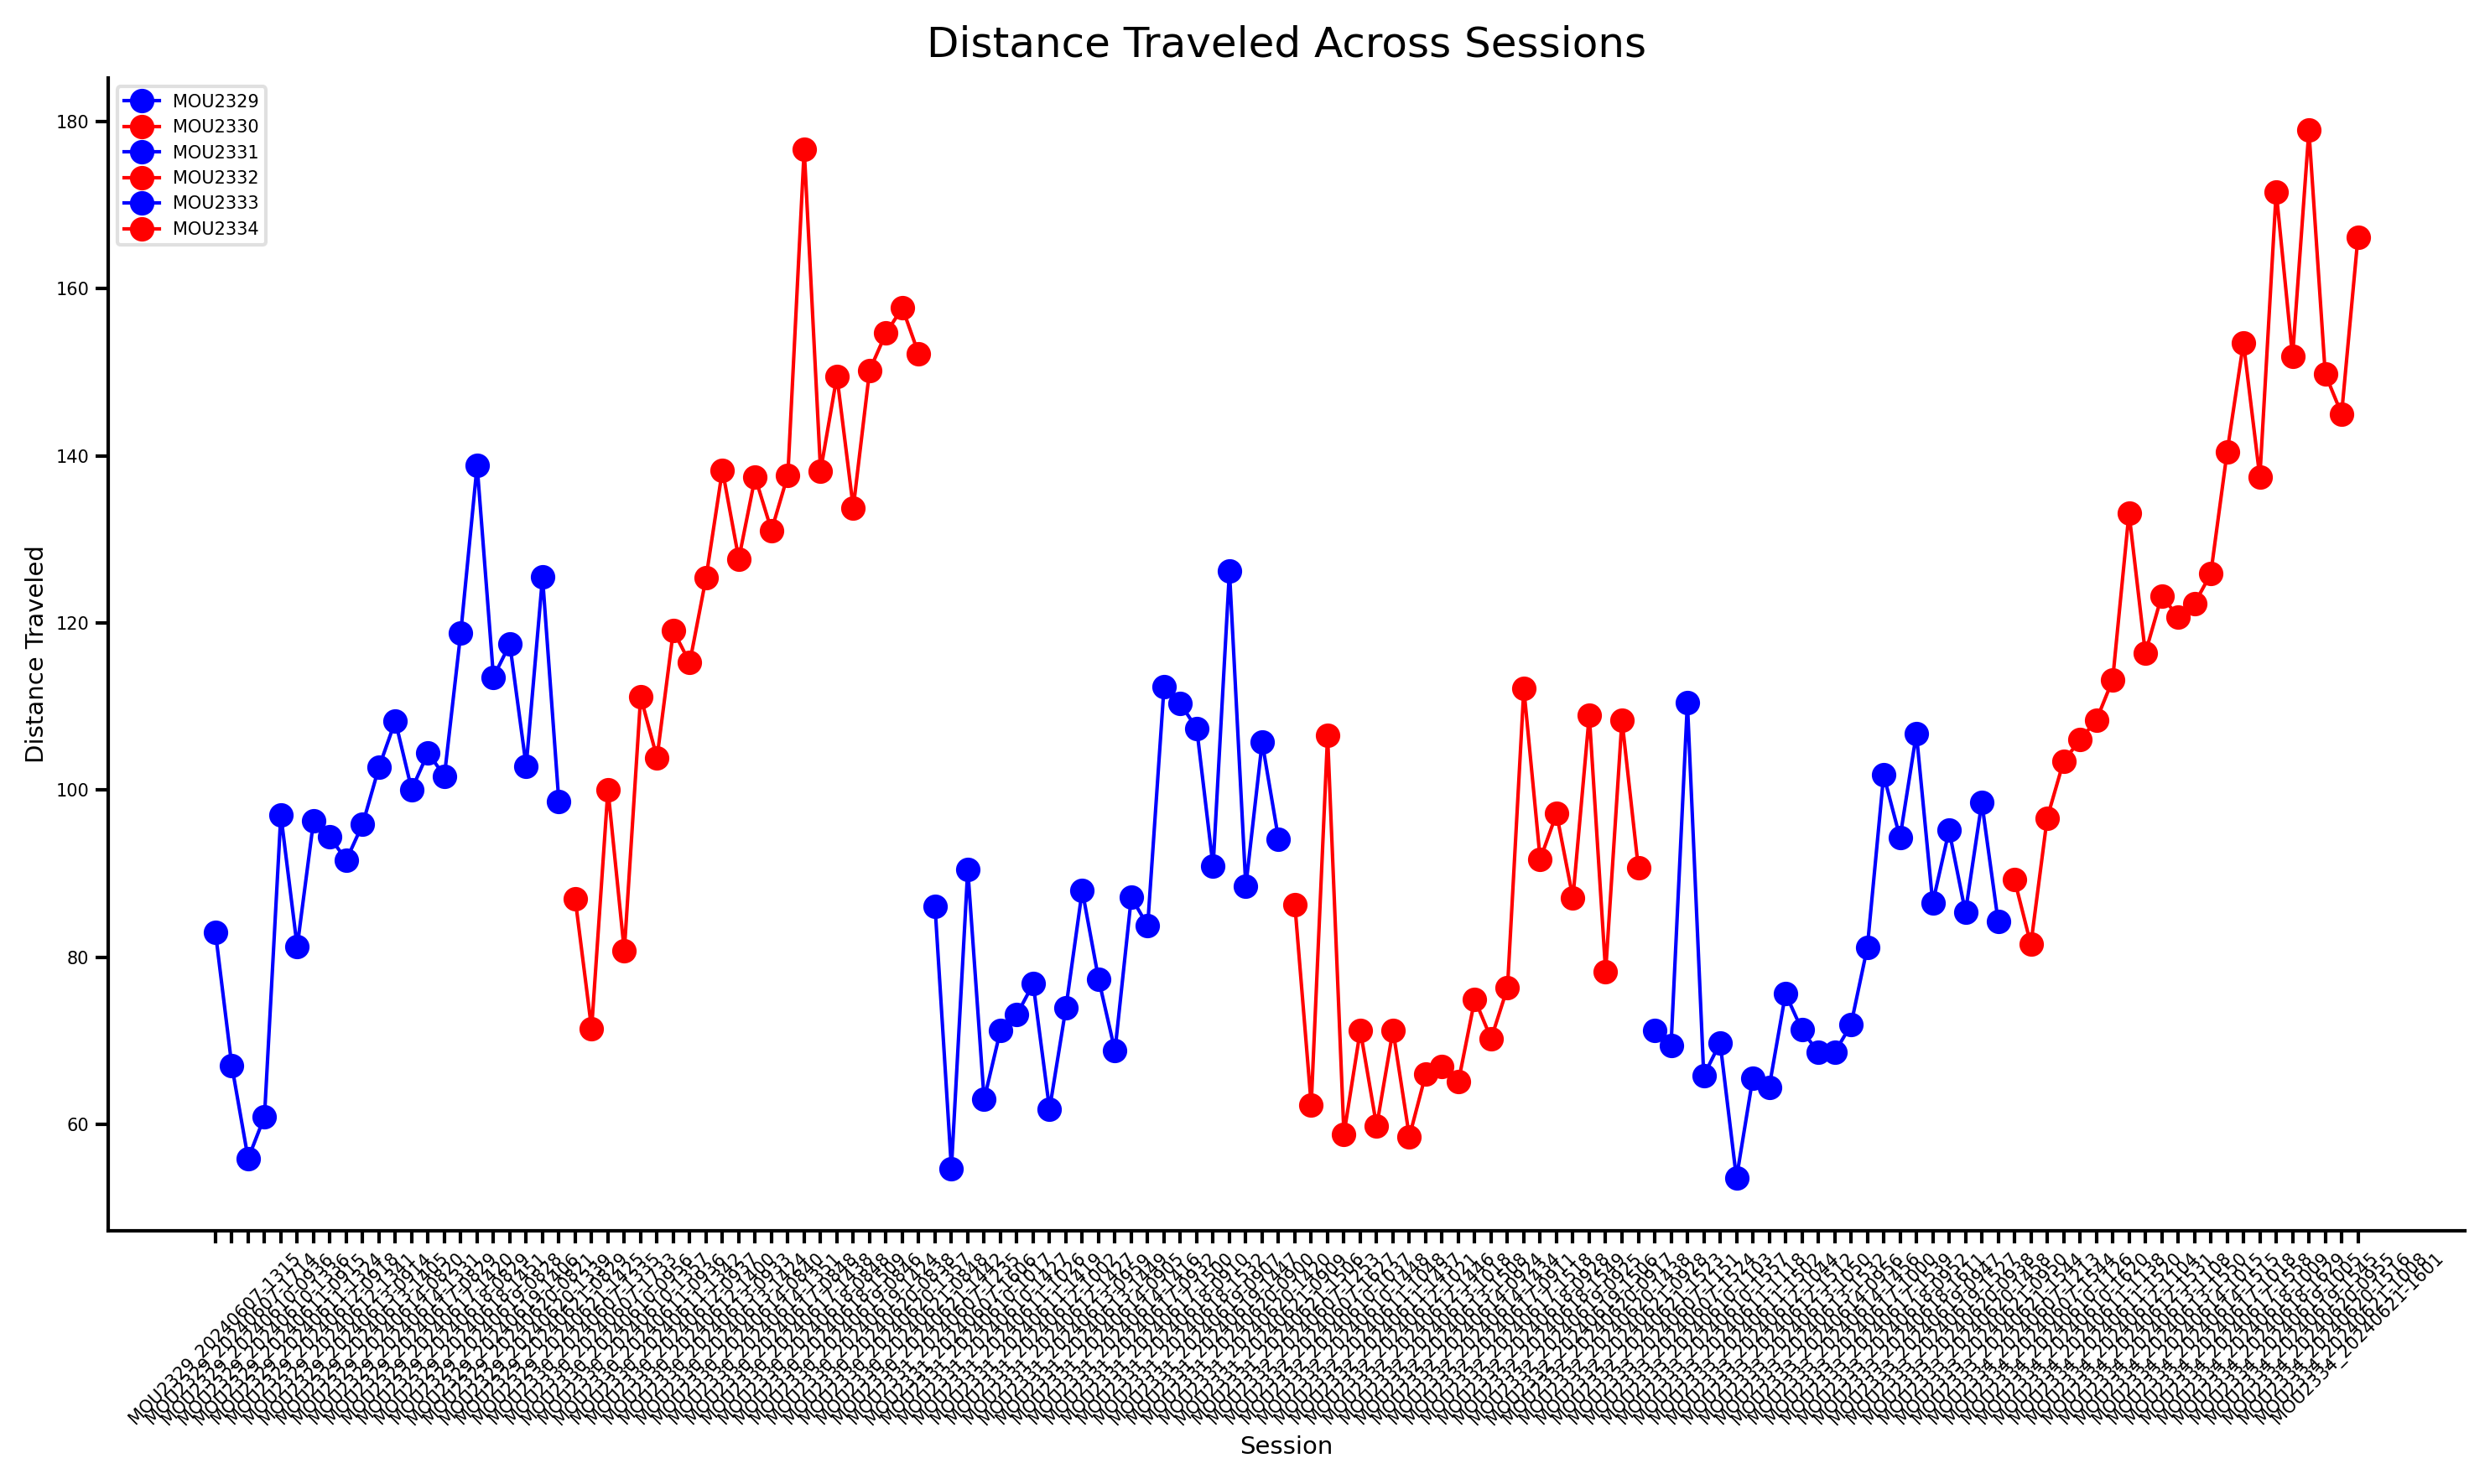

/tmp/ipykernel_39657/3045985326.py:44: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


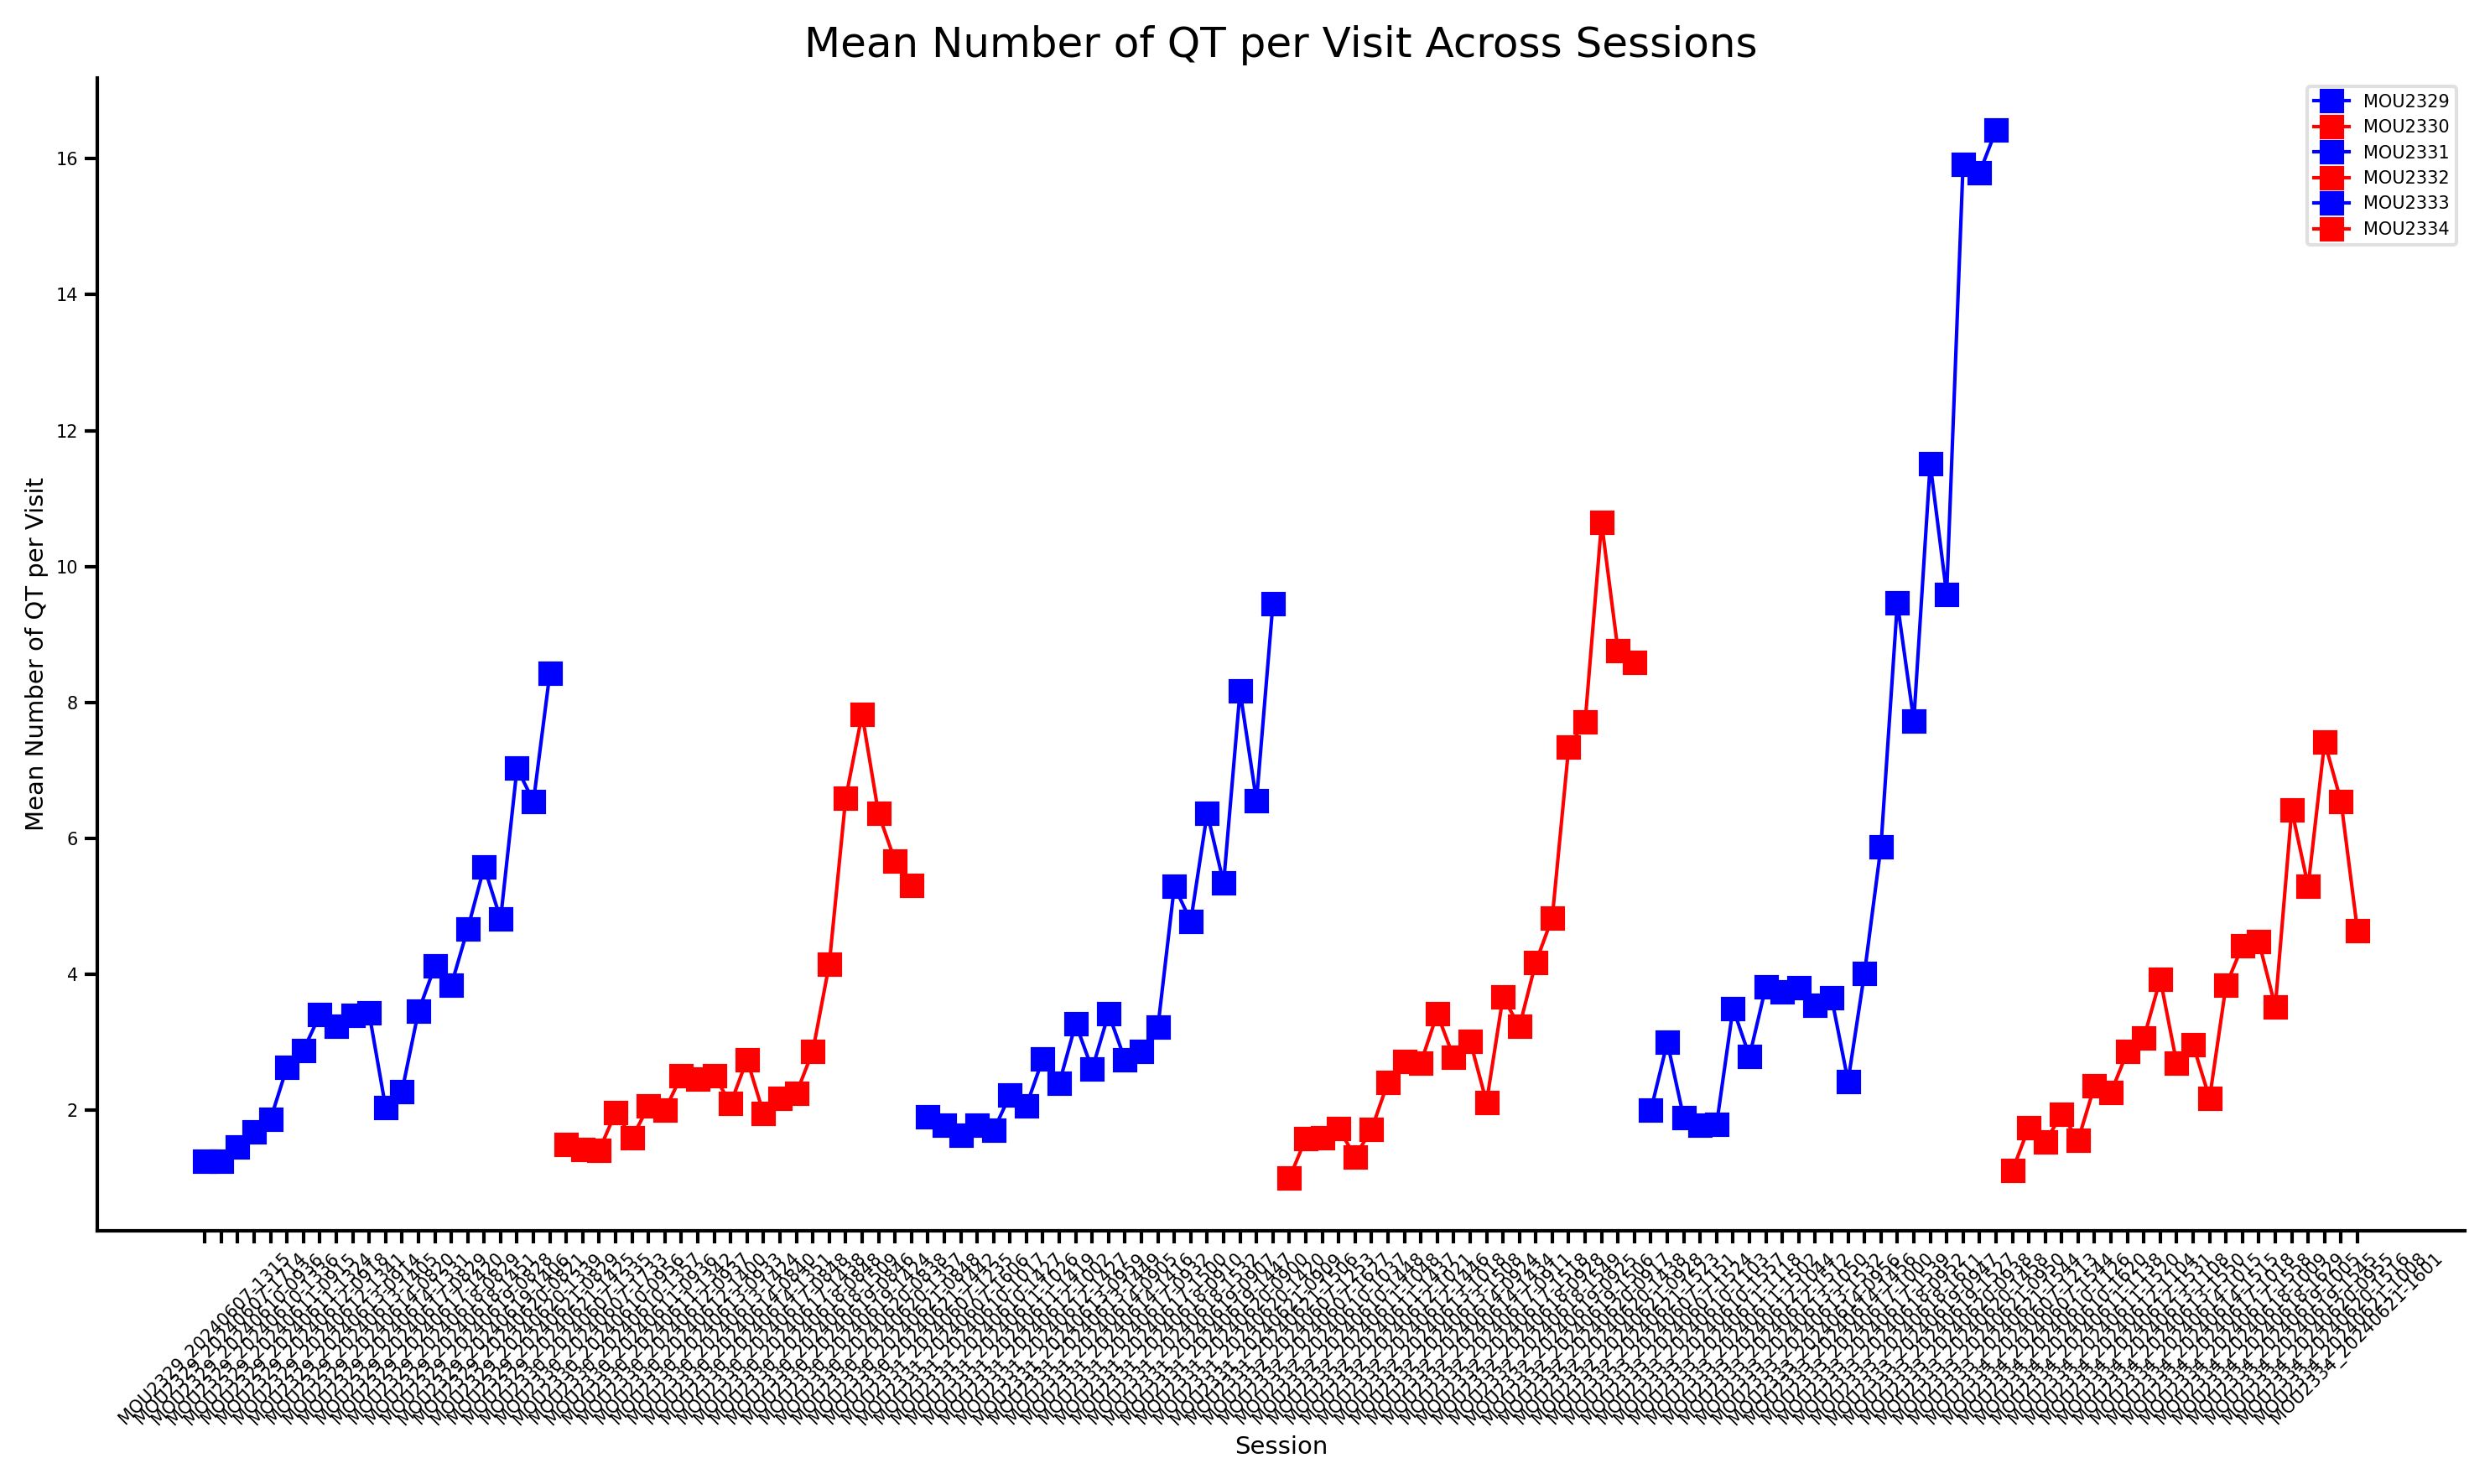

/tmp/ipykernel_39657/3045985326.py:63: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


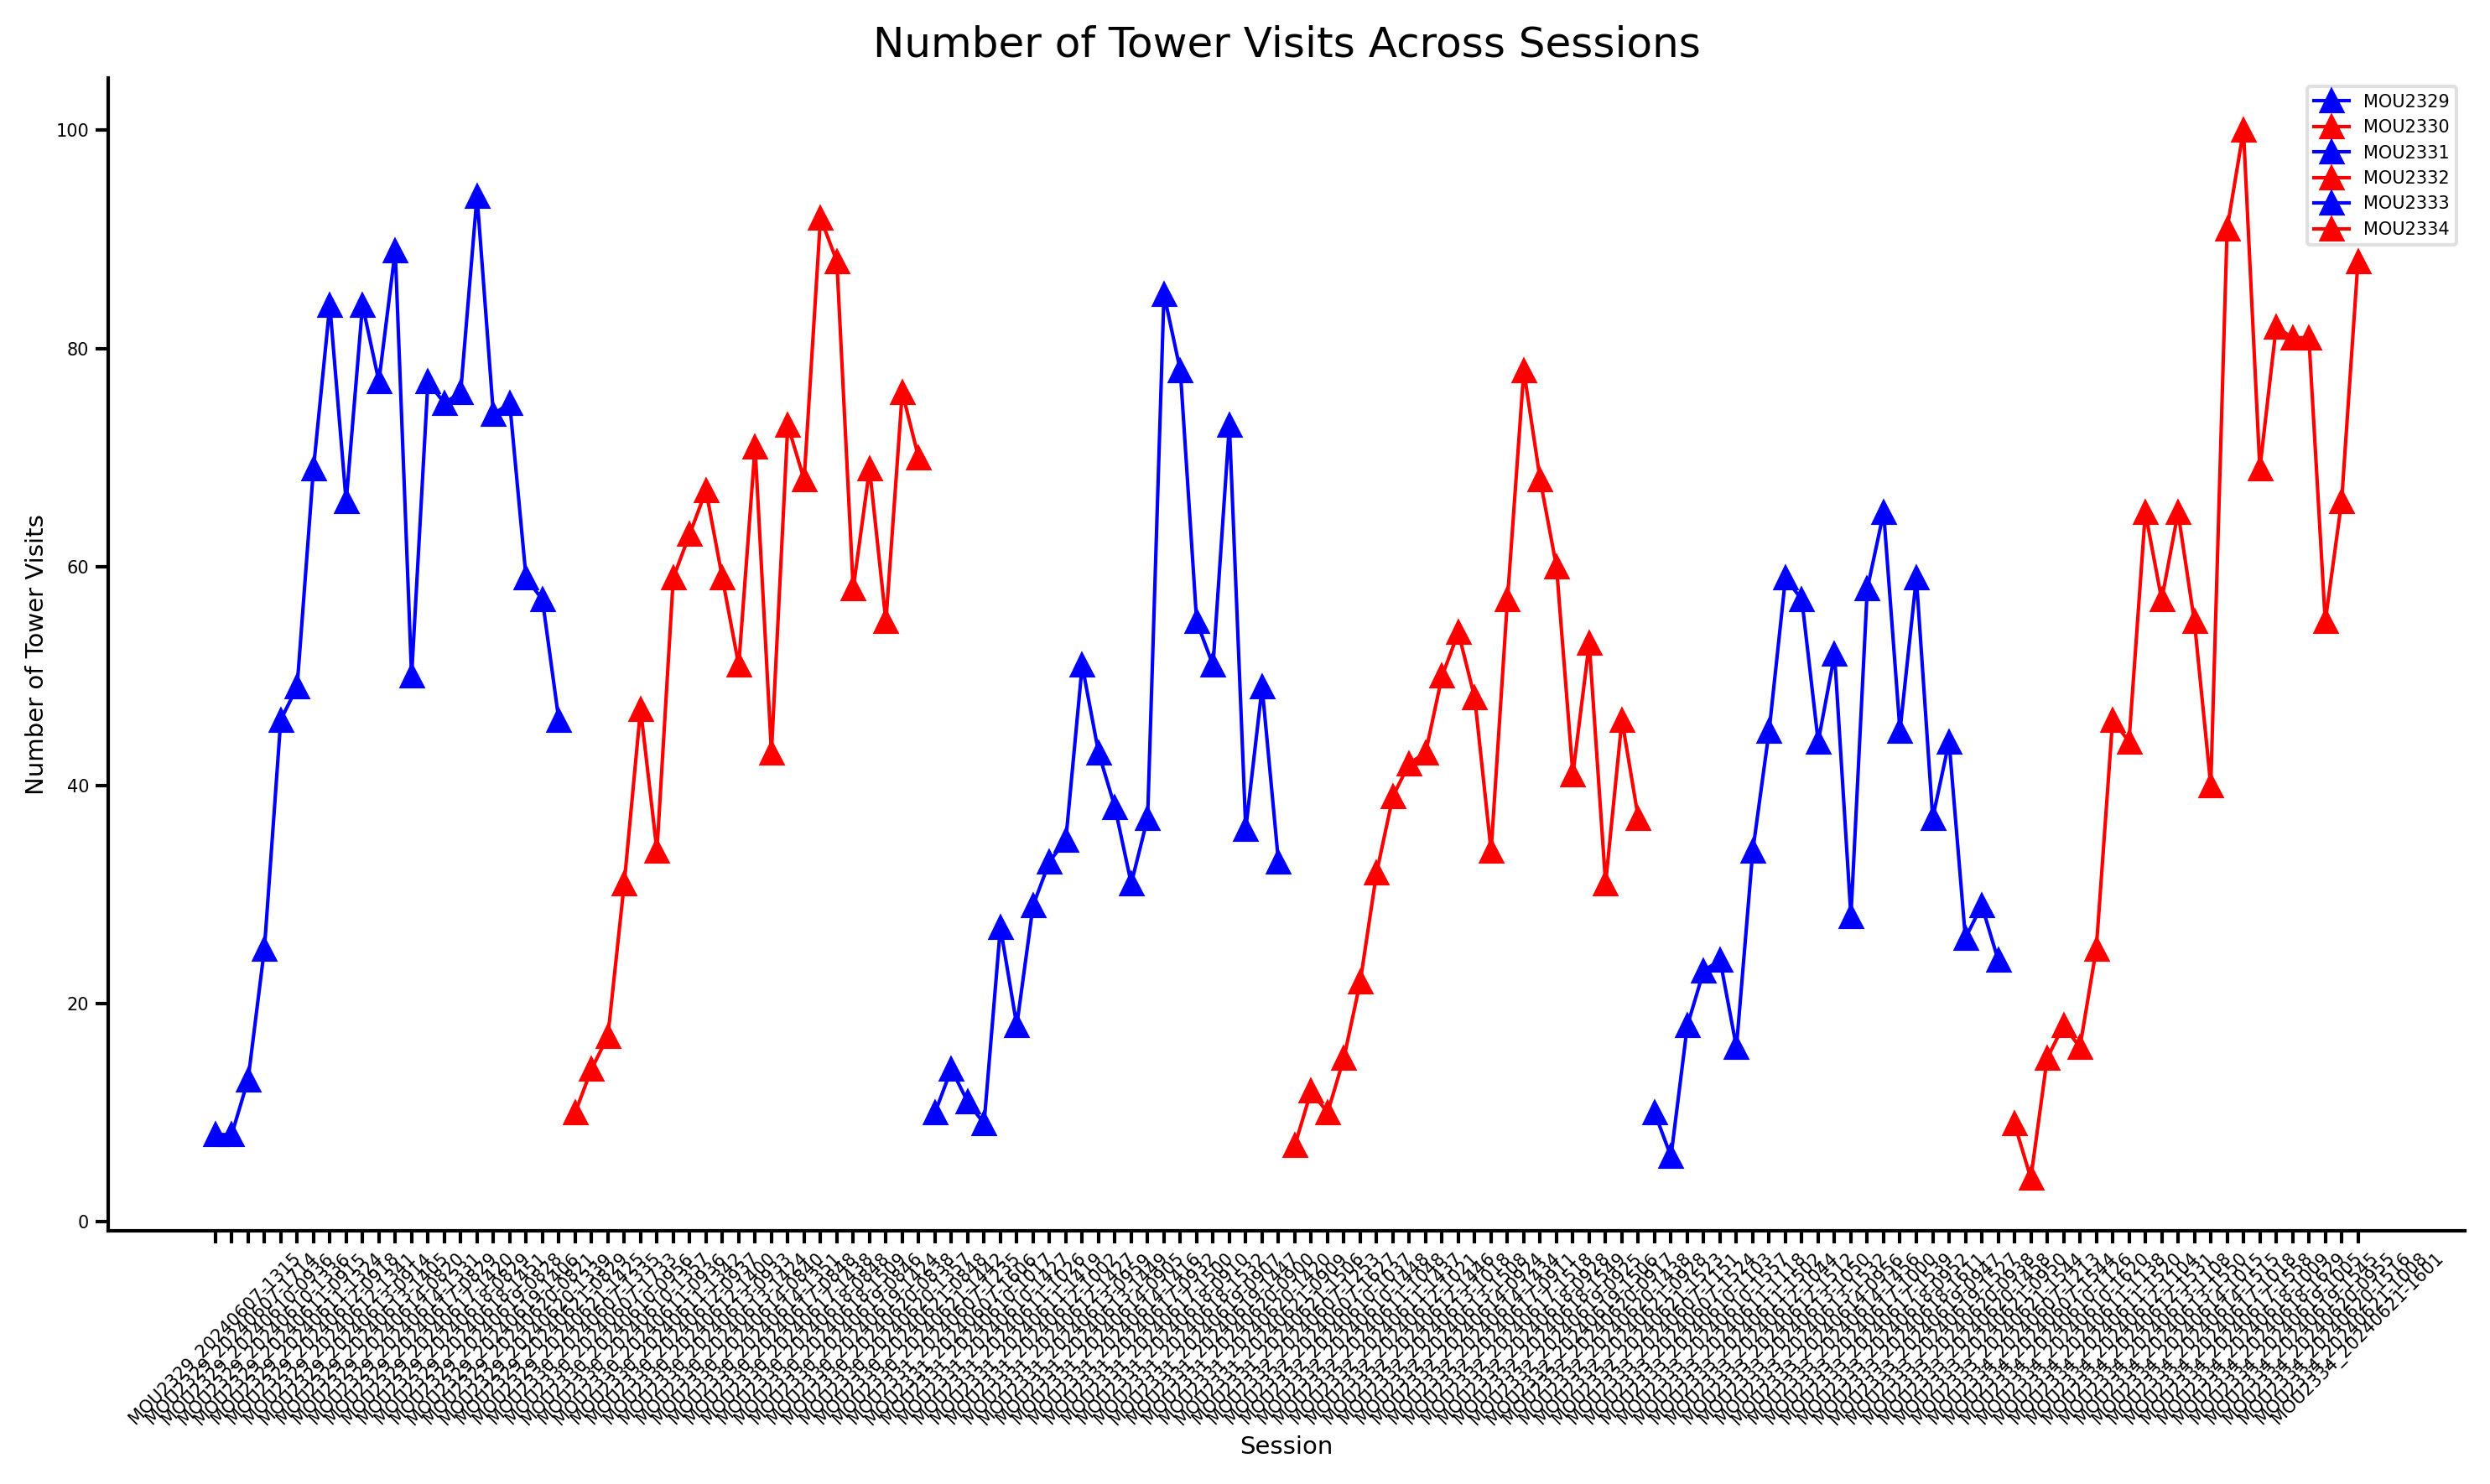

In [59]:
# Mapping odd and even mice names to colors
mice_colors = {}
for idx, mouse in enumerate(['MOU2329', 'MOU2330', 'MOU2331', 'MOU2332', 'MOU2333', 'MOU2334']):
    if idx % 2 == 0:
        mice_colors[mouse] = 'blue'
    else:
        mice_colors[mouse] = 'red'

# Plotting distance_traveled across sessions for each mouse
plt.figure(figsize=(10, 6))
for mouse, sessions_data in data.items():
    distances = []
    session_labels = []
    for session, session_data in sessions_data.items():
        if 'distance_traveled' in session_data:
            distances.append(session_data['distance_traveled'])
            session_labels.append(session)
    plt.plot(session_labels, distances, marker='o', linestyle='-', color=mice_colors[mouse], label=mouse)

plt.title('Distance Traveled Across Sessions')
plt.xlabel('Session')
plt.ylabel('Distance Traveled')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Plotting mean_nber_of_QT_per_visit across sessions for each mouse
plt.figure(figsize=(10, 6))
for mouse, sessions_data in data.items():
    means = []
    session_labels = []
    for session, session_data in sessions_data.items():
        if 'mean_nber_of_QT_per_visit' in session_data:
            means.append(session_data['mean_nber_of_QT_per_visit'])
            session_labels.append(session)
    plt.plot(session_labels, means, marker='s', linestyle='-', color=mice_colors[mouse], label=mouse)

plt.title('Mean Number of QT per Visit Across Sessions')
plt.xlabel('Session')
plt.ylabel('Mean Number of QT per Visit')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Plotting nber_of_tower_visits across sessions for each mouse
plt.figure(figsize=(10, 6))
for mouse, sessions_data in data.items():
    visits = []
    session_labels = []
    for session, session_data in sessions_data.items():
        if 'nber_of_tower_visits' in session_data:
            visits.append(session_data['nber_of_tower_visits'])
            session_labels.append(session)
    plt.plot(session_labels, visits, marker='^', linestyle='-', color=mice_colors[mouse], label=mouse)

plt.title('Number of Tower Visits Across Sessions')
plt.xlabel('Session')
plt.ylabel('Number of Tower Visits')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()